# Why does crime happen in Chicago? - Progress Report

## Intro

Our project revolves around the study of crime data in Chicago in 2022 to find out more about how safe the city is. We will examine whether the presence of alcohol establishments, primary schools, and law enforcement sentiment influences crime rates in different neighborhoods. In our view, understanding these relationships can facilitate development of specific strategies for reducing crime and making communities safer. Additionally, our research examines predictive analytics using machine learning which predicts possible future crimes based on factors such as: location, time, specifics (eg - neighborhoods). This study is aimed at offering insights to police departments and urban planners to better deploy their resources before the crimes occur. Moreover, we conduct an in-depth analysis of arrest data with a view to finding out patterns that exist across various types of crimes. Through this investigation, law enforcement practices will be informed, while intervention strategies will be improved upon for greater effectiveness. Thus, we aim to offer insights that can be put into action towards ensuring overall safety and well-being for all residents in Chicago.

## Changes since the proposal

One of the issues we faced was finding socio-economic data. The data that we found was limited and included past info, ie, from 2008 to 2012. Since we wanted to do a more recent analysis, we switched this subpart of the problem to alcohol establishments, which aims to see if there is a correlation between the crimes occurring in an area with the presence of such alcohol establishments. Another issue we ran into was how large the main dataset, Crimes Occurred in Chicago, was and thus we decided to look more deeply into the relations between crime and other factors for Chicago 2022, instead of looking from a high level across the years.

## Data

1. **<u>Crimes Occurred</u>** - The dataset is a list of any and all crimes committed from 2001 till present date. Since the dataset was huge, we extracted past year (2022) data from Chicago Data portal to look at relations between various factors affecting crime rate. Certain column types were changed, missing values were dropped, new columns were created. All this occurred as and when needed during EDA and visulization of our hypothesis such as 'What are the type 5 crimes committed per district?' and 'Is there a correlation between the type of crime committed and offender being arrested?' etc.
2. **<u>Arrests</u>** - This dataset provides a comprehensive overview of law enforcement arrest records from 2014 to 2023, encompassing unique identifiers for each case, precise arrest dates and times, and demographic details of the individuals arrested, such as race, age, and gender. It includes in-depth charge information, categorising offenses into types and classes and providing specific statute numbers. Out of these attributes, race and charge_type were used to figure out the trends of arrests. Column names were modified to remove the spaces and to making the casing consistent. Additional fields were derived from existing fields such as year for convenience. Data cleaning wasn’t required as there weren’t any NaN values in the attributes of interest.
3. **<u>Public Schools Progress Report</u>** - It provides information about a variety of aspects in Elementary, Middle, and High schools in Chicago. From this, we first extracted the information that was relevant in our case. Information about the type of school, location setting of the school, how supportive the environment is and how safe the school is are important factors that we are taking into consideration when evaluating what causes crime in various Chicago neighborhoods. We have also looked at how the attendance levels of teachers and students and the suspension rates change with how safe the school is perceived which will further provide insights into factors that are affected by crime in Chicago.
4. **<u>Police Sentiment Scores</u>** - Utilizing the Sodapy API, I imported sentiment data from the Chicago Police database, which includes information on safety and trust scores among different racial groups in neighborhoods. Also includes varoius classifications based on age, gender,income,respect .The data was segmented based on the respective collection years, and column data types were modified for better representation. A thorough data cleaning process was undertaken, addressing and managing any null values encountered in the dataset to enhance its reliability.
5. **<u>Alcohol Establishments</u>** - The Socrata library was used to get the data from the cityofchicago website. First, unneccessary columns were filtered out from the table, then the alcohol establishment locations were determined using the type of license and the rows were filtered out to include only these locations. We further had to clean the data so that the latitude and longitude were not null and were of type float to be able to be passed to the spatial plots.

## Data Analysis and Machine Learning

### Analysing different types of crimes that occurred in Chicago 2022 - Done by Aayush Gupta

The data is extracted from Chicago Data Portal [Crimes - 2001 to Present](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2). We perform basic EDA to understand our data.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
crimes_occurred = pd.read_csv('data/Crimes_2022.csv')
crimes_occurred.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
0,13024128,JG202134,12/31/2022 11:55:00 PM,055XX W ADAMS ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,RESIDENCE - YARD (FRONT / BACK),False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12938426,JG100085,12/31/2022 11:50:00 PM,055XX W WASHINGTON BLVD,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,"(41.882256634, -87.763744015)",52.0,22216.0,26.0,674.0,7.0,32.0,25.0,97.0,29.0
2,12938337,JG100016,12/31/2022 11:50:00 PM,014XX W LUNT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,ALLEY,False,False,...,"(42.009107852, -87.666843608)",3.0,21853.0,10.0,358.0,5.0,9.0,11.0,37.0,49.0
3,12938351,JG100087,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,0560,ASSAULT,SIMPLE,STREET,True,False,...,"(41.72781203, -87.660399127)",18.0,21554.0,72.0,195.0,13.0,59.0,9.0,244.0,21.0
4,12938340,JG100005,12/31/2022 11:47:00 PM,091XX S LAFLIN ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,...,"(41.72781203, -87.660399127)",18.0,21554.0,72.0,195.0,13.0,59.0,9.0,244.0,21.0


In [4]:
crimes_occurred.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'Wards 2023-'],
      dtype='object')

In [5]:
crime_total = crimes_occurred.loc[:, ['Primary Type']].value_counts().reset_index(name='Count')
crime_total

,Primary Type,Count
0,THEFT,54842
1,BATTERY,40922
2,CRIMINAL DAMAGE,27242
3,MOTOR VEHICLE THEFT,21448
4,ASSAULT,20803
5,DECEPTIVE PRACTICE,16515
6,OTHER OFFENSE,14572
7,ROBBERY,8964
8,WEAPONS VIOLATION,8775
9,BURGLARY,7595


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Offenses count in Chicago 2022')

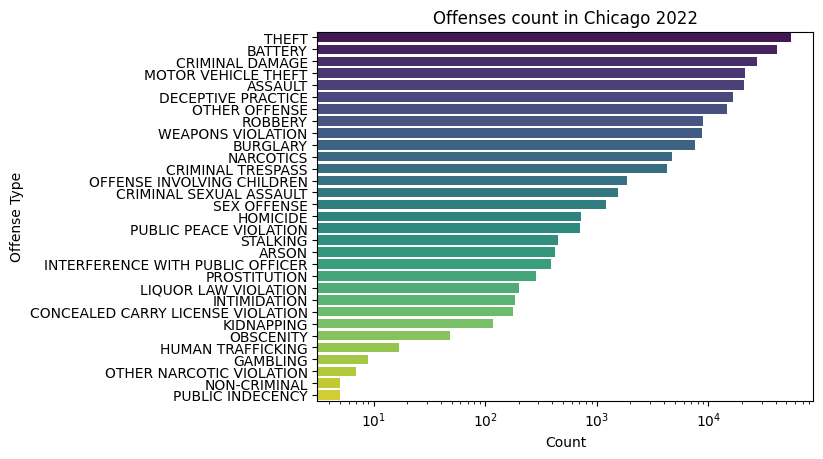

In [6]:
axis = sns.barplot(crime_total, x='Count', y='Primary Type', palette='viridis')
axis.set_xscale('log')
axis.set_ylabel('Offense Type')
axis.set_title('Offenses count in Chicago 2022')

#### Observation

There are crimes in huge numbers as Theft, Battery, Criminal Damage etc. to as low as Gambling, Public Indecency. This leads to various questions:

1. What are the top 5 crimes per district?
2. Is there a correlation between the type of crime and arrest made?
3. Are there any specific districts which are crime hotspots? Any specific crimes that occur?
4. For any arrest made, is there a correlation between the type of crime and the ethnicity of the offender?

### Top 5 crimes per district

In [7]:
crimes_per_district = crimes_occurred.groupby(['Police Districts', 'Primary Type']).size().reset_index(name='Count')
crimes_per_district

,Police Districts,Primary Type,Count
0,1.0,ARSON,11
1,1.0,ASSAULT,554
2,1.0,BATTERY,1105
3,1.0,BURGLARY,312
4,1.0,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
586,25.0,ROBBERY,336
587,25.0,SEX OFFENSE,36
588,25.0,STALKING,11
589,25.0,THEFT,1111


In [8]:
crimes_per_district = crimes_per_district.sort_values(by=['Police Districts', 'Count'], ascending=[True, False])
crimes_per_district['Police Districts'] = crimes_per_district['Police Districts'].astype(int)
top_5_district_crimes = crimes_per_district.groupby('Police Districts').head(5)
top_5_district_crimes

,Police Districts,Primary Type,Count
24,1,THEFT,1829
2,1,BATTERY,1105
5,1,CRIMINAL DAMAGE,819
1,1,ASSAULT,554
8,1,DECEPTIVE PRACTICE,532
...,...,...,...
569,25,BATTERY,1721
589,25,THEFT,1111
571,25,CRIMINAL DAMAGE,1042
581,25,MOTOR VEHICLE THEFT,903


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

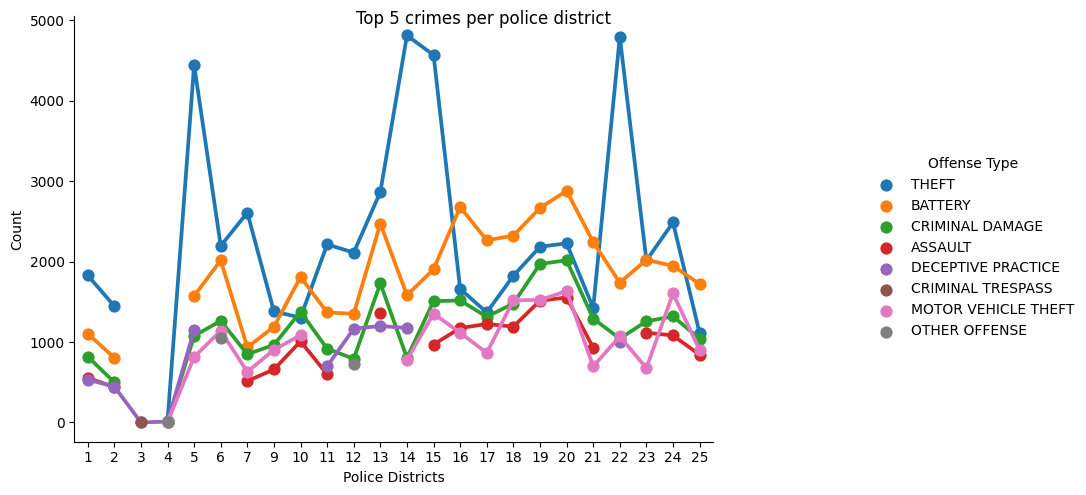

In [9]:
axis = sns.catplot(top_5_district_crimes, y='Count', x='Police Districts', hue='Primary Type', kind='point')
axis.figure.set_figwidth(12)
axis.figure.suptitle('Top 5 crimes per police district')
legendObj = axis.legend
legendObj.set_title('Offense Type')

#### Observation

- As observed from before, Theft count is the highest, peaking in certain Police Districts. These districts can be considered as hotspots for crimes. We would need further analysis as to the motivation behind such high number of crimes occuring in 2022.

- Almost no crimes happened in District 3 and 4 in 2022? There can be 2 possible cases for a result like this - 
    1. Almost no crimes did occur in those districts
    2. No crimes were reported by the citizens to the police in those districts

    This can be determined by looking at previous years crime data and see if there is a big difference between previous years' crime data and this data

### Correlation between arrest made and type of crime

In [10]:
arrest_crime = crimes_occurred.loc[:, ['Arrest', 'Primary Type']].groupby(['Primary Type', 'Arrest']).size().reset_index(name='count')
arrest_crime

,Primary Type,Arrest,count
0,ARSON,False,385
1,ARSON,True,37
2,ASSAULT,False,18796
3,ASSAULT,True,2007
4,BATTERY,False,34999
...,...,...,...
56,STALKING,True,28
57,THEFT,False,52827
58,THEFT,True,2015
59,WEAPONS VIOLATION,False,3385


In [11]:
arrest_crime['total'] = arrest_crime.groupby('Primary Type')['count'].transform('sum')
arrest_crime['percent'] = (arrest_crime['count']/ arrest_crime['total']) * 100
arrest_crime

,Primary Type,Arrest,count,total,percent
0,ARSON,False,385,422,91.232227
1,ARSON,True,37,422,8.767773
2,ASSAULT,False,18796,20803,90.352353
3,ASSAULT,True,2007,20803,9.647647
4,BATTERY,False,34999,40922,85.526123
...,...,...,...,...,...
56,STALKING,True,28,447,6.263982
57,THEFT,False,52827,54842,96.325809
58,THEFT,True,2015,54842,3.674191
59,WEAPONS VIOLATION,False,3385,8775,38.575499


C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gaayu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

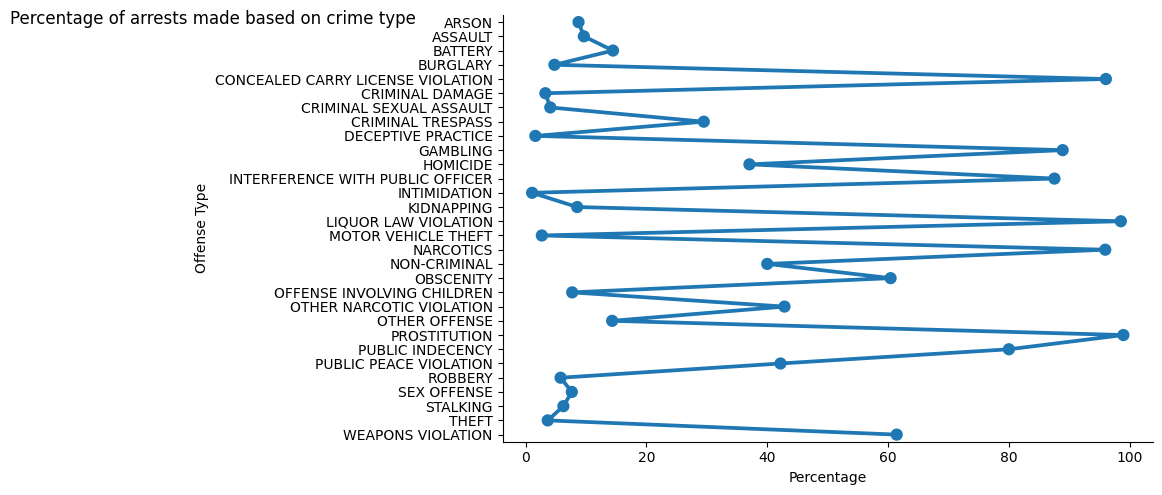

In [12]:
axis = sns.catplot(arrest_crime[arrest_crime['Arrest']==True], y='Primary Type', x='percent', kind='point')
axis.figure.set_figwidth(20)
axis.figure.suptitle('Percentage of arrests made based on crime type')
axis.set_axis_labels('Percentage', 'Offense Type')

#### Observation

- Even though Theft is leading in number of crimes committed, almost none of the offenders are arrested. This may be due to various factors such as type of Theft that occurred, the socio-economic status of the area that the crime occurred, or even the offender is never caught etc. We can further dive into the different types of Theft cases that occurred and determine for what crime exactly does a person get arrested.
- Certain crimes results in almost always in an arrest. Such crimes are Liquor Law Violation, Concealed Carry License Violation, Prostitution etc. Even though they may be low in number, they do lead to an arrest. 

### Predicting if an arrest was made based on various factors

In [13]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

- Selecting features - Primary Type, Domestic, Location Description, Police Districts
- Target label - Arrest

In [14]:
dt_df = crimes_occurred.loc[:, ['Primary Type', 'Arrest', 'Domestic', 'Location Description', 'Police Districts']]
print(f'Total number of rows: {dt_df.shape[0]}')
dt_df.head(5)

Total number of rows: 239028


,Primary Type,Arrest,Domestic,Location Description,Police Districts
0,WEAPONS VIOLATION,False,False,RESIDENCE - YARD (FRONT / BACK),NaN
1,BATTERY,False,True,APARTMENT,25.0
2,MOTOR VEHICLE THEFT,False,False,ALLEY,11.0
3,ASSAULT,True,False,STREET,9.0
4,WEAPONS VIOLATION,True,False,APARTMENT,9.0


Dropping NaN values

In [15]:
dt_df = dt_df.dropna()
print(f'Total number of rows after dropping NaN values: {dt_df.shape[0]}')
dt_df.head(5)

Total number of rows after dropping NaN values: 231749


,Primary Type,Arrest,Domestic,Location Description,Police Districts
1,BATTERY,False,True,APARTMENT,25.0
2,MOTOR VEHICLE THEFT,False,False,ALLEY,11.0
3,ASSAULT,True,False,STREET,9.0
4,WEAPONS VIOLATION,True,False,APARTMENT,9.0
5,OTHER OFFENSE,False,False,APARTMENT,25.0


Changing dtypes to category for one-hot encoding

In [16]:
dt_df['Primary Type'] = dt_df['Primary Type'].astype('category')
dt_df['Location Description'] = dt_df['Location Description'].astype('category')
dt_df['Police Districts'] = dt_df['Police Districts'].astype('category')
dt_df.dtypes

Primary Type            category
Arrest                      bool
Domestic                    bool
Location Description    category
Police Districts        category
dtype: object

In [17]:
x, y = dt_df.loc[:, ['Primary Type', 'Domestic', 'Location Description', 'Police Districts']], dt_df['Arrest']

In [18]:
x_encoded = pd.get_dummies(x, columns=['Primary Type', 'Location Description', 'Police Districts'])
x_encoded.head(5)

,Domestic,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,Primary Type_BURGLARY,Primary Type_CONCEALED CARRY LICENSE VIOLATION,Primary Type_CRIMINAL DAMAGE,Primary Type_CRIMINAL SEXUAL ASSAULT,Primary Type_CRIMINAL TRESPASS,Primary Type_DECEPTIVE PRACTICE,...,Police Districts_16.0,Police Districts_17.0,Police Districts_18.0,Police Districts_19.0,Police Districts_20.0,Police Districts_21.0,Police Districts_22.0,Police Districts_23.0,Police Districts_24.0,Police Districts_25.0
1,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=15)

In [20]:
dt_clf = DecisionTreeClassifier(random_state=15)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=15)

In [21]:
y_pred = dt_clf.predict(x_test)

In [22]:
metrics.accuracy_score(y_test, y_pred)

0.9163897878460985

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.98      0.95     61587
        True       0.74      0.42      0.53      7938

    accuracy                           0.92     69525
   macro avg       0.83      0.70      0.74     69525
weighted avg       0.91      0.92      0.91     69525



Using cross-validation to check overfitting

In [24]:
cvs = cross_val_score(dt_clf, x_train, y_train, cv=10, n_jobs=-1)
cvs

array([0.91468902, 0.91173026, 0.91419589, 0.91653825, 0.91659475,
       0.91086179, 0.91295771, 0.91345087, 0.91369745, 0.91671804])